# Proyecto Final

In [2]:
%load_ext autoreload
%autoreload 2

## Importación de la data

In [3]:
# Import libreries
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functions import *



Ideas: 1. predicción de la cotización de las 5 empresas con la mayor capitalización del nasdaq? FAANG para los sigueintes años 2025 y 2026 me gustaría llegar hasta el 2030 pero aun no se como saldrá el asunto
Facebook, Amazon, Apple, Netflix y Google.

In [4]:
aapl_data = download_stock_data("AAPL")
#aapl_data_clean = preprocess_data(aapl_data)
#aapl_predictions = model_stock_price(aapl_data_clean)

# Luego se puede iterar para las demás empresas:
companies = {
    'Apple': 'AAPL',
    'Microsoft': 'MSFT',
    'Amazon': 'AMZN',
    'Alphabet': 'GOOGL',
    'NVIDIA': 'NVDA'
}

# for company, ticker in companies.items():
#     data = download_stock_data(ticker)
#     data_clean = preprocess_data(data)
#     predictions = model_stock_price(data_clean)
#     mae, rmse = evaluate_model(predictions, data['Close'])
#     print(f'{company} - MAE: {mae}, RMSE: {rmse}')

## Cleaned data

In [5]:
# Normalizar los nombres de las columnas
apple_data = normalizar_nombres_columnas(aapl_data)

In [6]:
data_report = data_quality_report(aapl_data)

----- Informe de Calidad de Datos -----

Valores nulos por columna:
 open            0
high            0
low             0
close           0
volume          0
dividends       0
stock_splits    0
dtype: int64

Número de filas duplicadas: 0

Tipos de datos:
 open            float64
high            float64
low             float64
close           float64
volume            int64
dividends       float64
stock_splits    float64
dtype: object

Descripción estadística de las columnas numéricas:
               open         high          low        close        volume  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2.516000e+03   
mean     89.830484    90.794239    88.924610    89.903168  1.203018e+08   
std      63.025546    63.691585    62.400028    63.079665  6.913564e+07   
min      20.642058    21.025082    20.520501    20.720039  2.404830e+07   
25%      33.442848    33.562137    33.290224    33.441665  7.385610e+07   
50%      56.602338    57.300251    56.306001    56.806755 

In [7]:
# Preprocesar los datos (ajuste por stock splits, dividendos, normalización, estandarización)
apple_adjusted, apple_normalized, apple_standardized = preprocess_data(apple_data)

Preprocesamiento completo. Se han generado versiones con los datos ajustados, normalizados y estandarizados.


## EDA Análisis Exploratorio de Datos

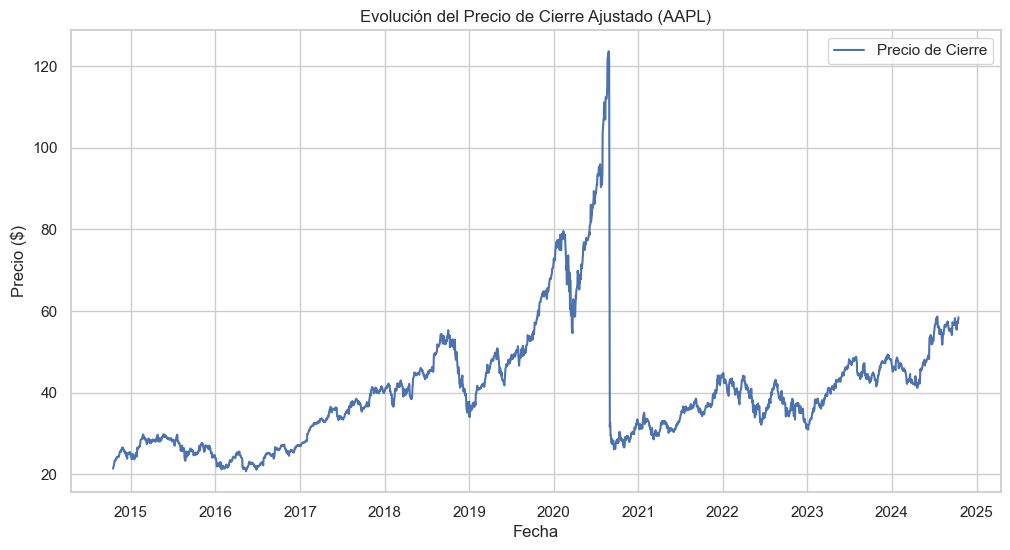

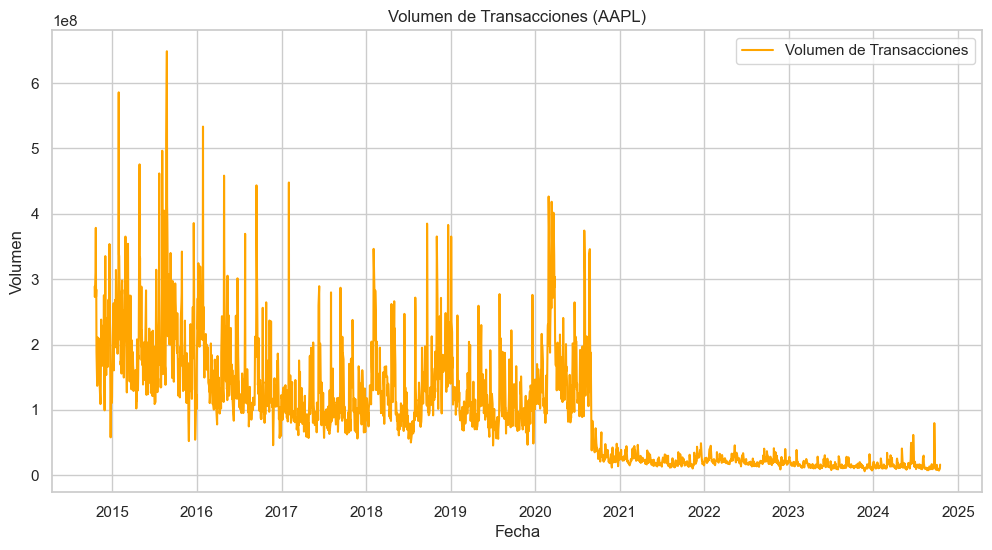

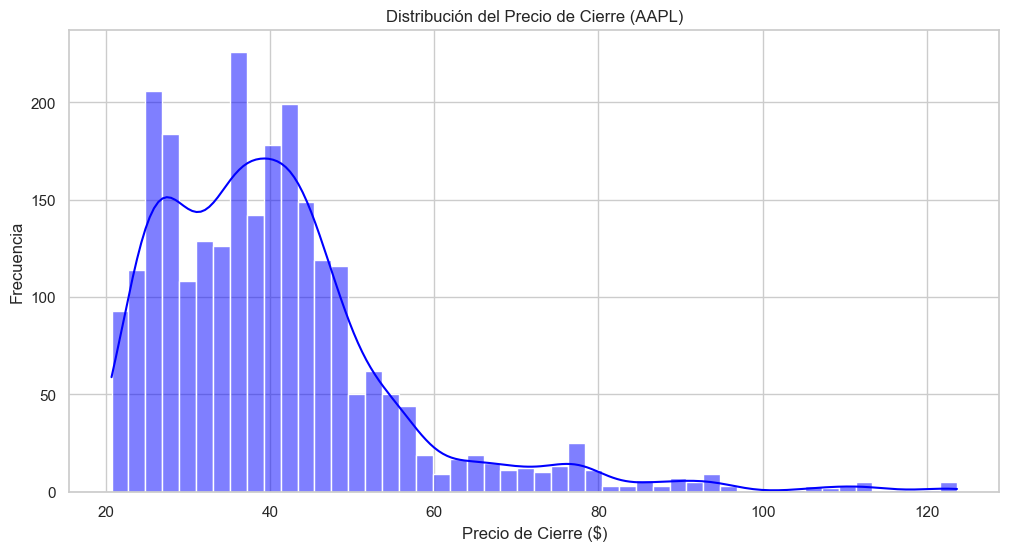

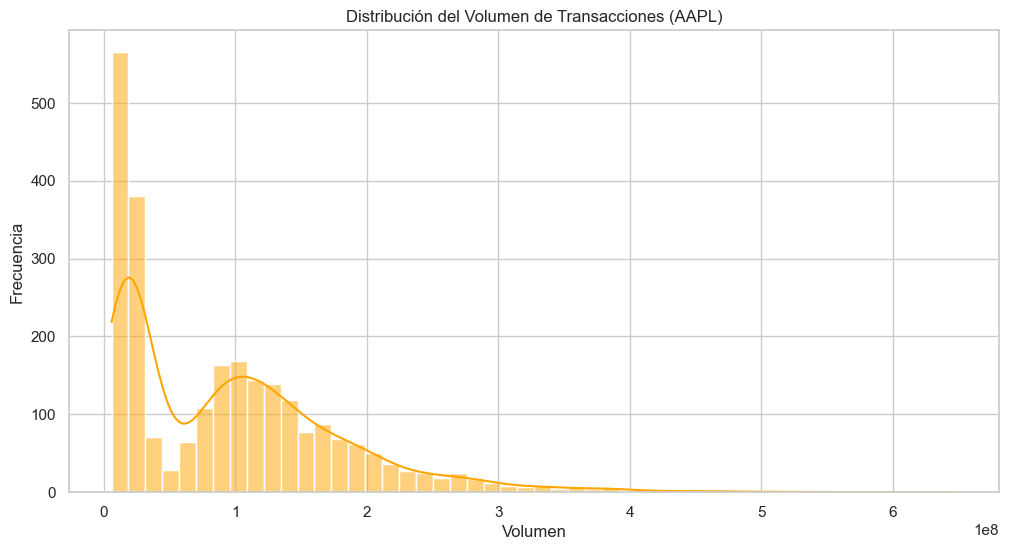

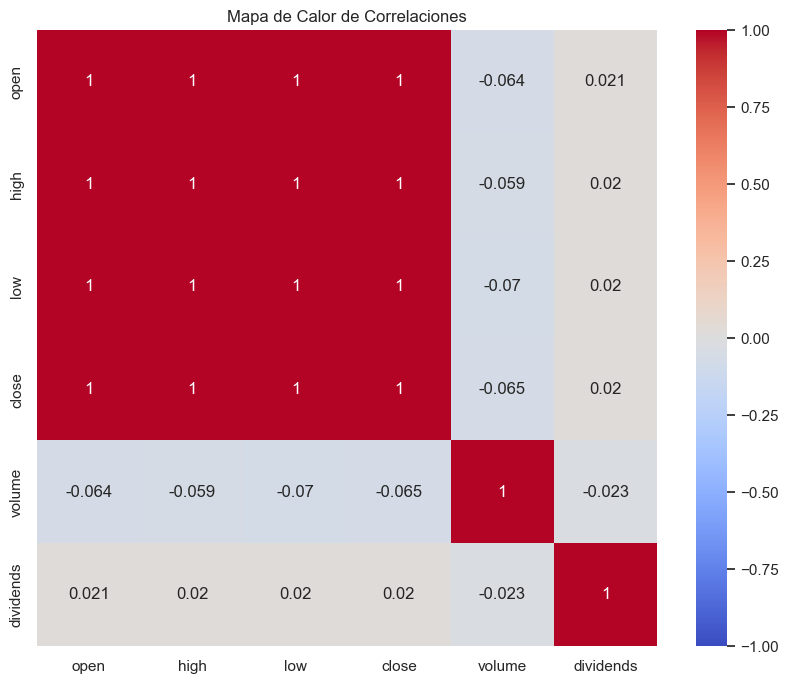

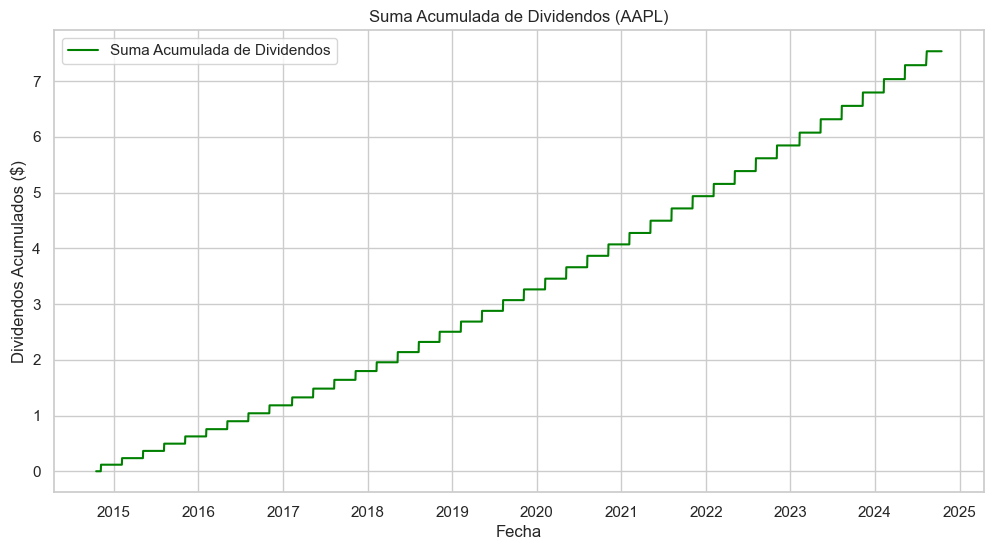

EDA completado.


In [8]:
#Probaremos los modelos tanto con los datos sin normalizar como con los datos normalizados y estandarizados, para comparar su rendimiento.
# Realizamos el EDA en los datos ajustados
perform_eda(apple_adjusted)

### normalized

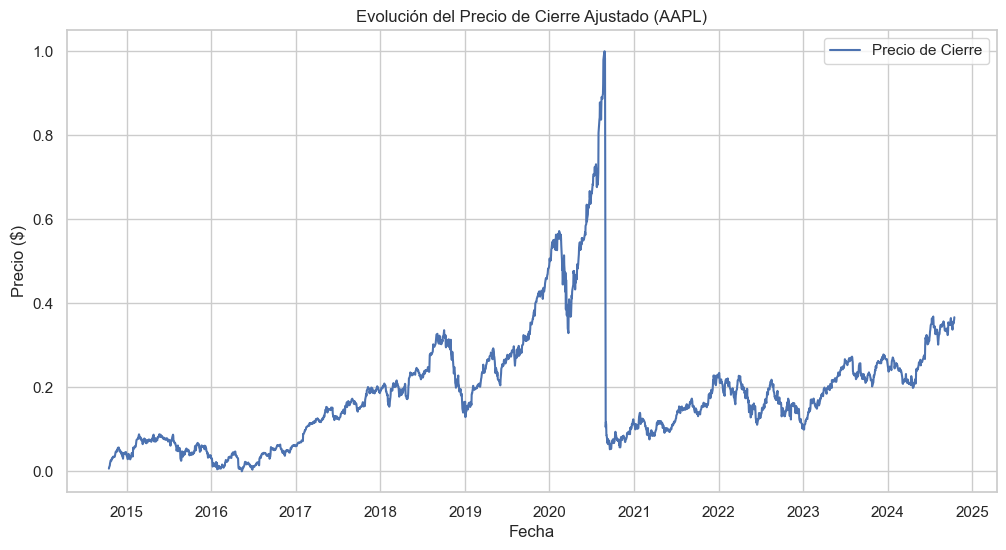

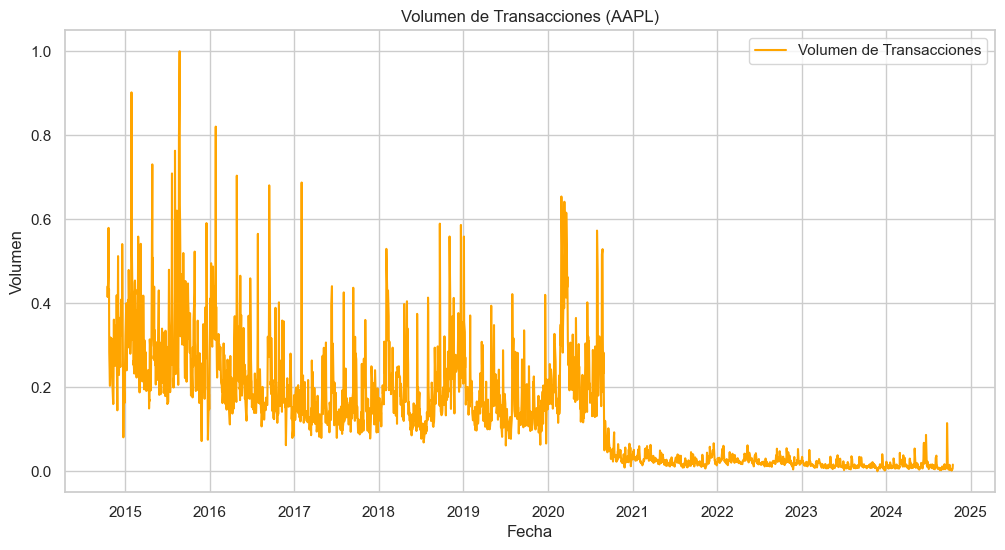

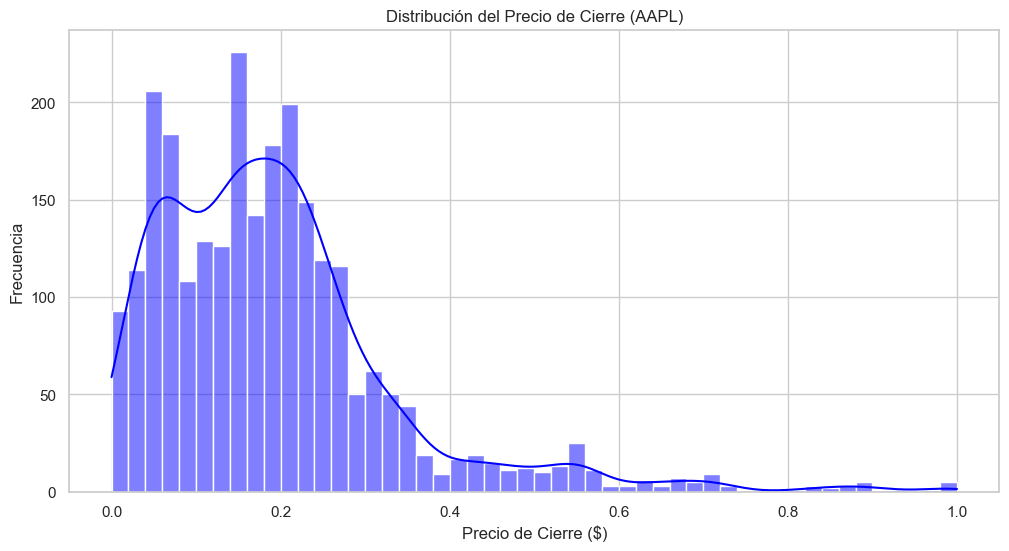

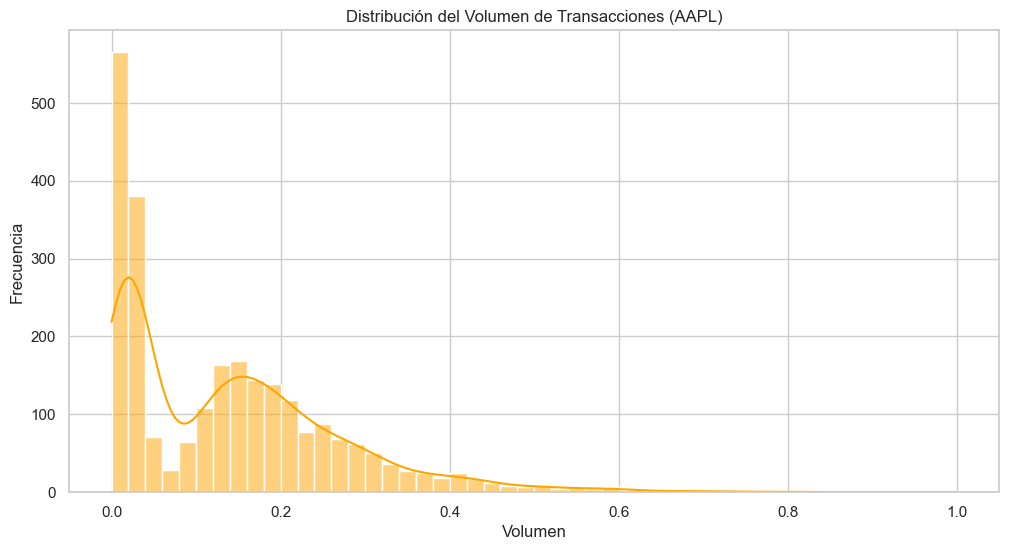

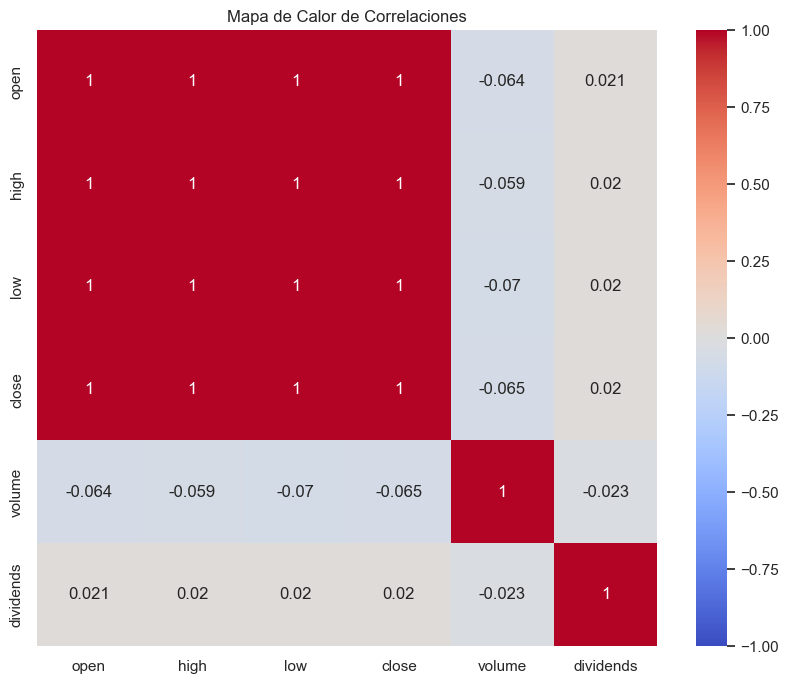

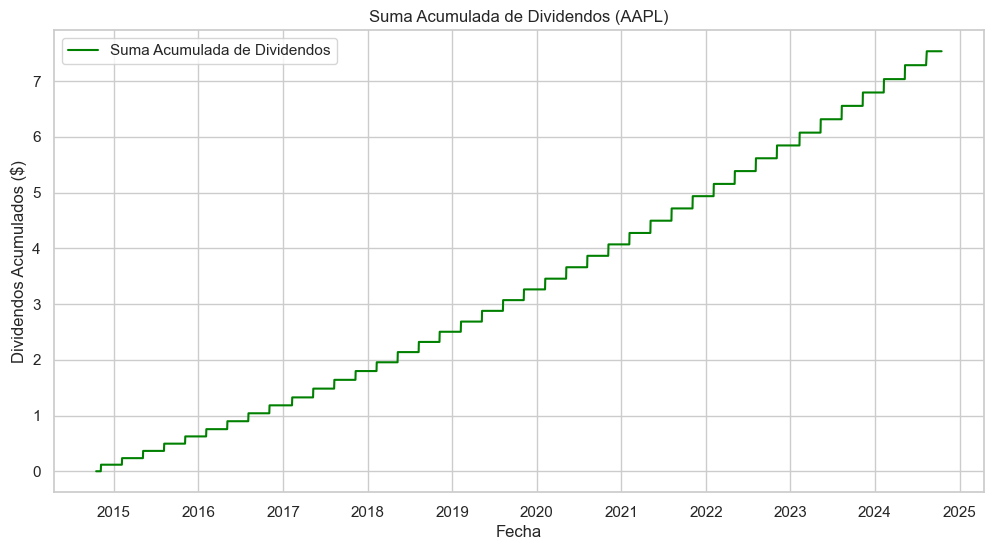

EDA completado.


In [9]:
perform_eda(apple_normalized)

### standardized

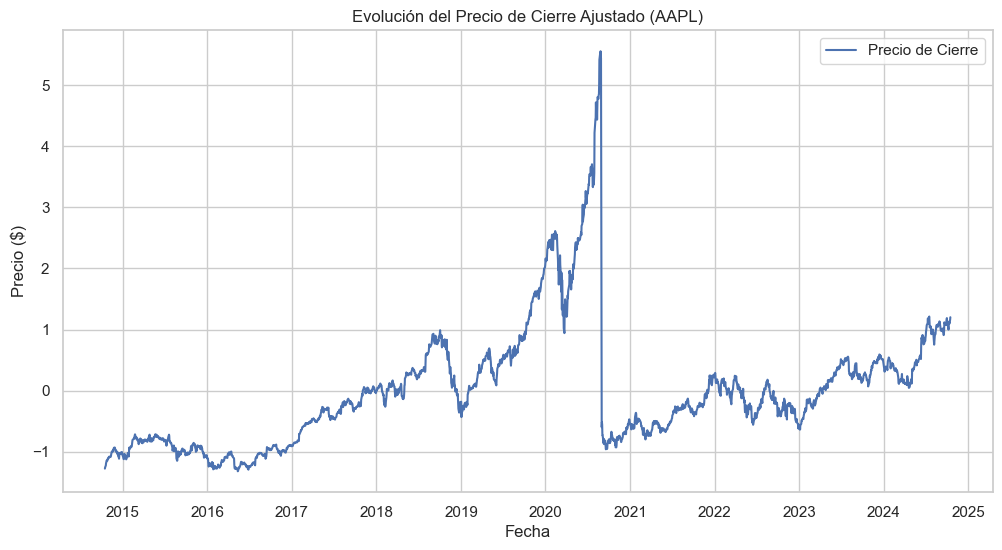

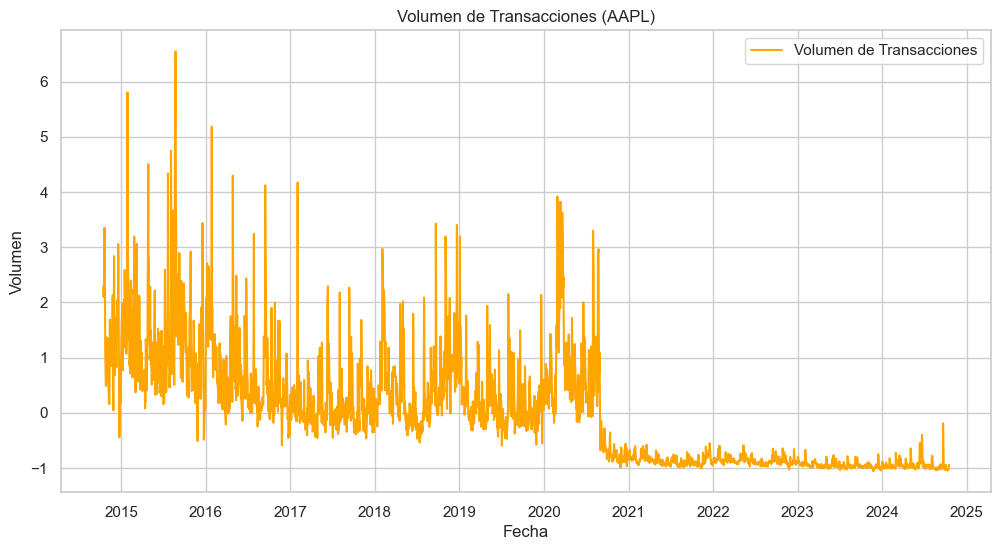

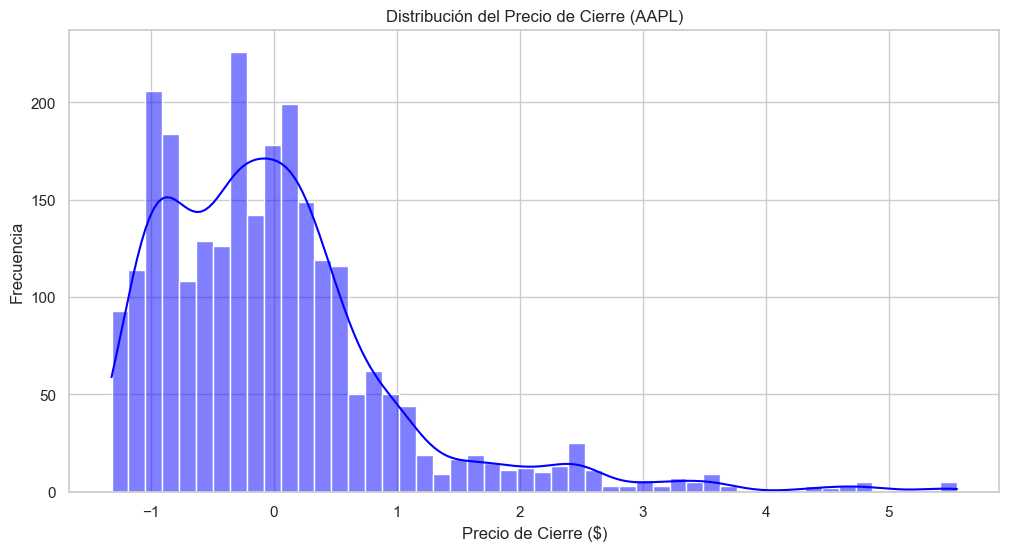

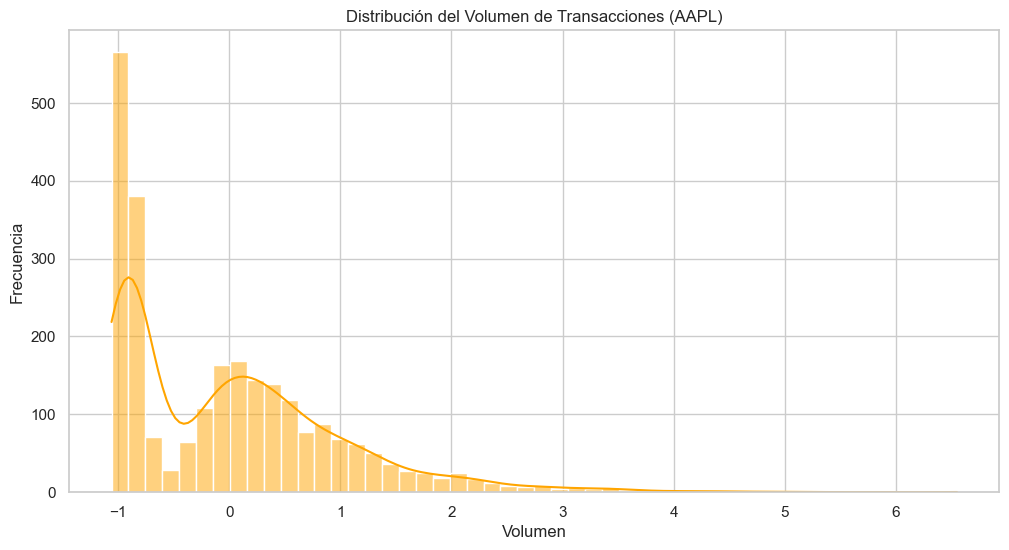

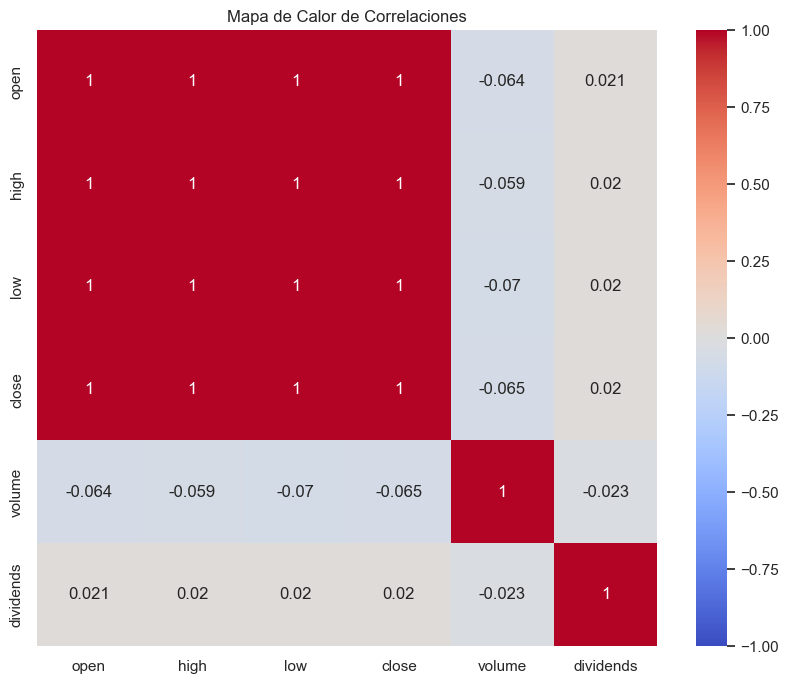

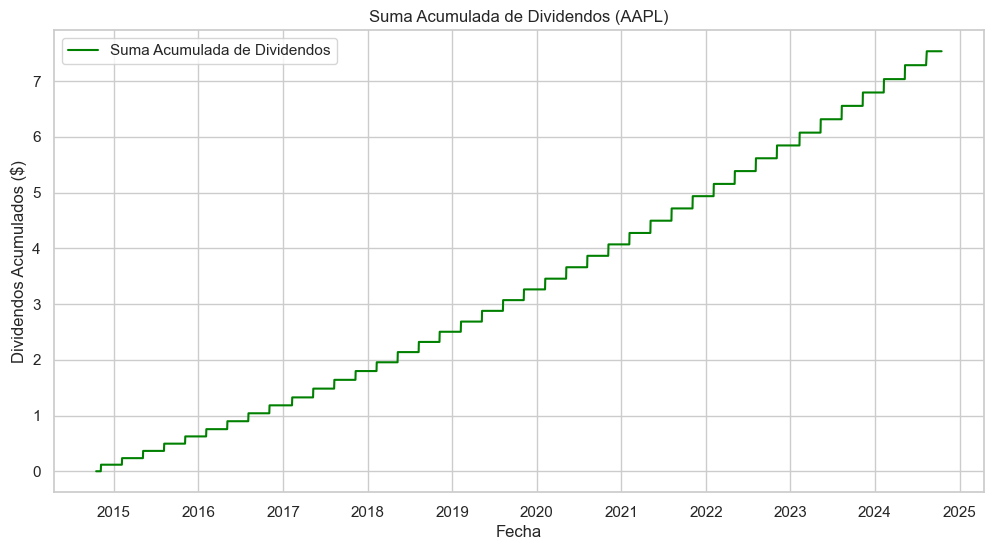

EDA completado.


In [10]:
perform_eda(apple_standardized)

# Modelos Entrenamientos comparativas 1

### Random Forest

In [11]:
def train_validation_split(df, train_size=0.8):
    train_index = int(len(df) * train_size)
    train_data = df.iloc[:train_index]
    validation_data = df.iloc[train_index:]
    return train_data, validation_data

# Dividir los datos en entrenamiento (2010-2021) y validación (2022-2023)
train_adjusted, validation_adjusted = train_validation_split(apple_adjusted)
train_normalized, validation_normalized = train_validation_split(apple_normalized)
train_standardized, validation_standardized = train_validation_split(apple_standardized)

# Después de esta división, ya puedes ejecutar Random Forest.


In [12]:
# Definir las características (features) y el objetivo (target)
features = ['open', 'high', 'low', 'volume']  # Características (variables predictoras)
target = 'close'  # Objetivo (precio de cierre que queremos predecir)
# Entrenamos y evaluamos el modelo Random Forest en los tres conjuntos de datos
print("Random Forest - Datos Sin Escalar:")
model_rf_adjusted, y_pred_rf_adjusted, val_mae_rf_adjusted, val_rmse_rf_adjusted, r2_rf_adjusted = train_random_forest_model(
    train_adjusted, validation_adjusted, features, target)
print(f"MAE en validación: {val_mae_rf_adjusted}, RMSE en validación: {val_rmse_rf_adjusted}, R² en validación: {r2_rf_adjusted}")

print("\nRandom Forest - Datos Normalizados:")
model_rf_normalized, y_pred_rf_normalized, val_mae_rf_normalized, val_rmse_rf_normalized, r2_rf_normalized = train_random_forest_model(
    train_normalized, validation_normalized, features, target)
print(f"MAE en validación: {val_mae_rf_normalized}, RMSE en validación: {val_rmse_rf_normalized}, R² en validación: {r2_rf_normalized}")

print("\nRandom Forest - Datos Estandarizados:")
model_rf_standardized, y_pred_rf_standardized, val_mae_rf_standardized, val_rmse_rf_standardized, r2_rf_standardized = train_random_forest_model(
    train_standardized, validation_standardized, features, target)
print(f"MAE en validación: {val_mae_rf_standardized}, RMSE en validación: {val_rmse_rf_standardized}, R² en validación: {r2_rf_standardized}")


Random Forest - Datos Sin Escalar:
MAE en validación: 0.24603978263007273, RMSE en validación: 0.3311154669311694, R² en validación: 0.9974413476331898

Random Forest - Datos Normalizados:
MAE en validación: 0.0023882301451002177, RMSE en validación: 0.0032157160577663225, R² en validación: 0.9974435565726407

Random Forest - Datos Estandarizados:
MAE en validación: 0.016438320391958364, RMSE en validación: 0.022238284723736273, R² en validación: 0.997416048323919


In [21]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Definir una función para entrenar el modelo con búsqueda de hiperparámetros
def train_random_forest_model(train_data, validation_data, features, target):
    # Separar características y objetivo
    X_train = train_data[features]
    y_train = train_data[target]
    
    X_validation = validation_data[features]
    y_validation = validation_data[target]
    
    # Definir el modelo Random Forest
    rf = RandomForestRegressor(random_state=42)
    
    # Definir el espacio de búsqueda de hiperparámetros
    param_grid = {
        'n_estimators': [100, 200, 500],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'bootstrap': [True, False]
    }

    # Realizar RandomizedSearchCV
    rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                                   n_iter=10, cv=3, verbose=2, random_state=42, n_jobs=-1)

    # Entrenar el modelo
    rf_random.fit(X_train, y_train)
    
    # Predicciones
    y_pred_train = rf_random.predict(X_train)
    y_pred_validation = rf_random.predict(X_validation)
    
    # Evaluación del modelo
    train_mae = mean_absolute_error(y_train, y_pred_train)
    validation_mae = mean_absolute_error(y_validation, y_pred_validation)
    
    train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
    validation_rmse = np.sqrt(mean_squared_error(y_validation, y_pred_validation))
    
    train_r2 = r2_score(y_train, y_pred_train)
    validation_r2 = r2_score(y_validation, y_pred_validation)
    
    print(f"Mejores hiperparámetros: {rf_random.best_params_}")
    
    return rf_random.best_estimator_, y_pred_validation, validation_mae, validation_rmse, validation_r2

# Entrenar el modelo con los datos ajustados
model_rf_adjusted, y_pred_rf_adjusted, val_mae_rf_adjusted, val_rmse_rf_adjusted, r2_rf_adjusted = train_random_forest_model(
    train_adjusted, validation_adjusted, features, target)
print(f"MAE: {val_mae_rf_adjusted}, RMSE: {val_rmse_rf_adjusted}, R²: {r2_rf_adjusted}")


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Mejores hiperparámetros: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}
MAE: 0.24627319163746317, RMSE: 0.3312045626094781, R²: 0.9974399704970482


### Regresion lineal

In [13]:
# Importar la función desde functions.py
from functions import train_regression_model

# Entrenar y evaluar el modelo en los tres conjuntos de datos
print("Regresión Lineal - Datos Sin Escalar:")
model_adjusted, y_pred_adjusted, val_mae_adjusted, val_rmse_adjusted, r2_adjusted = train_regression_model(
    train_adjusted, validation_adjusted, features, target)
print(f"MAE en validación: {val_mae_adjusted}, RMSE en validación: {val_rmse_adjusted}, R² en validación: {r2_adjusted}")

print("\nRegresión Lineal - Datos Normalizados:")
model_normalized, y_pred_normalized, val_mae_normalized, val_rmse_normalized, r2_normalized = train_regression_model(
    train_normalized, validation_normalized, features, target)
print(f"MAE en validación: {val_mae_normalized}, RMSE en validación: {val_rmse_normalized}, R² en validación: {r2_normalized}")

print("\nRegresión Lineal - Datos Estandarizados:")
model_standardized, y_pred_standardized, val_mae_standardized, val_rmse_standardized, r2_standardized = train_regression_model(
    train_standardized, validation_standardized, features, target)
print(f"MAE en validación: {val_mae_standardized}, RMSE en validación: {val_rmse_standardized}, R² en validación: {r2_standardized}")


Regresión Lineal - Datos Sin Escalar:
MAE en validación: 0.18436557467706471, RMSE en validación: 0.2376642642791648, R² en validación: 0.9986818036072459

Regresión Lineal - Datos Normalizados:
MAE en validación: 0.001791288783452943, RMSE en validación: 0.00230913679013642, R² en validación: 0.9986818036060454

Regresión Lineal - Datos Estandarizados:
MAE en validación: 0.012321543029935846, RMSE en validación: 0.015883607704408543, R² en validación: 0.9986818036060454


### ARIMA/SARIMA ###

In [14]:

# Dividir los datos en entrenamiento y validación para ARIMA/SARIMA
train_arima, validation_arima = train_validation_split(apple_adjusted)
# Asegurarte de que el índice tenga una frecuencia diaria
train_arima.index = pd.date_range(start=train_arima.index[0], periods=len(train_arima), freq='B')
validation_arima.index = pd.date_range(start=validation_arima.index[0], periods=len(validation_arima), freq='B')

# Parámetros iniciales de ARIMA y SARIMA
arima_order = (5, 1, 0)  # (p, d, q)
sarima_order = (1, 1, 1)  # (p, d, q)
seasonal_order = (1, 1, 1, 12)  # (P, D, Q, s) - s es el período estacional (12 para mensual)

# Entrenar y evaluar el modelo ARIMA
print("ARIMA - Datos Sin Escalar:")
arima_result, y_pred_arima, val_mae_arima, val_rmse_arima = train_arima_model(
    train_arima, validation_arima, target, arima_order)
print(f"MAE en validación: {val_mae_arima}, RMSE en validación: {val_rmse_arima}")

# Entrenar y evaluar el modelo SARIMA
print("\nSARIMA - Datos Sin Escalar:")
sarima_result, y_pred_sarima, val_mae_sarima, val_rmse_sarima = train_sarima_model(
    train_arima, validation_arima, target, sarima_order, seasonal_order)
print(f"MAE en validación: {val_mae_sarima}, RMSE en validación: {val_rmse_sarima}")

ARIMA - Datos Sin Escalar:
MAE en validación: 10.76692419223209, RMSE en validación: 12.4775516345323

SARIMA - Datos Sin Escalar:
MAE en validación: 9.003240114982132, RMSE en validación: 10.515101036480171


In [24]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Ajustar SARIMA
sarima_model = SARIMAX(train_data, order=(1,1,1), seasonal_order=(1,1,1,12))
sarima_fit = sarima_model.fit()

# Predicciones
y_pred_sarima = sarima_fit.forecast(steps=len(test_data))

# Evaluación
mae_sarima = mean_absolute_error(test_data, y_pred_sarima)
rmse_sarima = np.sqrt(mean_squared_error(test_data, y_pred_sarima))
print(f"SARIMA - MAE: {mae_sarima}, RMSE: {rmse_sarima}")


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA - MAE: 6.255644181063986, RMSE: 6.778037097135917


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


### Prueba modelo prophet

In [15]:
# %pip install ipywidgets --upgrade

In [16]:
# %pip install plotly


In [17]:
apple_adjusted.columns

Index(['open', 'high', 'low', 'close', 'volume', 'dividends', 'stock_splits',
       'dividend_return'],
      dtype='object')

In [18]:

from prophet import Prophet


# Configurar Prophet para usar cmdstanpy como backend
model = Prophet(stan_backend='CMDSTANPY')

# Continuar con el entrenamiento
model.fit(apple_adjusted)


def prepare_data_with_date(df):
    # Convierte el índice en una columna
    df_with_date = df.reset_index()  # Convierte el índice en una columna
    df_with_date.rename(columns={'index': 'date'}, inplace=True)  # Renombrar la columna a 'date'
    return df_with_date

def train_prophet_model(df, target):
    # Preparar los datos para Prophet
    df_prophet = prepare_data_with_date(df)
    
    # Imprimir las columnas para verificar que 'date' está presente
    print(df_prophet.columns)
    
    # Usar la columna 'date' y la columna target ('close')
    df_prophet = df_prophet[['Date', target]]
    df_prophet.columns = ['ds', 'y']  # Prophet requiere 'ds' para fechas y 'y' para valores
    
    # Crear y entrenar el modelo Prophet
    model = Prophet()
    model.fit(df_prophet)
    
    # Crear predicciones hasta el 2030
    future = model.make_future_dataframe(periods=365*6)  # Predicción para los próximos 6 años (hasta 2030)
    forecast = model.predict(future)
    
    return model, forecast

# Llamar a la función con los datos ajustados
prophet_model, forecast = train_prophet_model(apple_adjusted, target='close')



UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe0 in position 9: invalid continuation byte

In [30]:
# %pip install pystan==2.19.1.1 --only-binary=:all:


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pystan==2.19.1.1 (from versions: 3.0.0b1, 3.0.0b2, 3.0.0b3, 3.0.0b4, 3.0.0b5, 3.0.0b6, 3.0.0b7, 3.0.0b8, 3.0.0rc1, 3.0.0, 3.0.1, 3.0.2, 3.1.0, 3.1.1, 3.2.0, 3.3.0, 3.4.0, 3.5.0, 3.6.0, 3.7.0, 3.8.0, 3.9.0, 3.9.1, 3.10.0)
ERROR: No matching distribution found for pystan==2.19.1.1


In [31]:
# %pip install cmdstanpy

Note: you may need to restart the kernel to use updated packages.


In [29]:
#%pip install pystan==2.19.1.1


  Using cached pystan-2.19.1.1.tar.gz (16.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py clean for pystan
Failed to build pystan
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> [21261 lines of output]
      C:\Users\danny\AppData\Local\Temp\pip-install-mbded2vd\pystan_3d774c0432814d56b3c8cb9d6eb76698\setup.py:235: DeprecationWarning:
      
        `numpy.distutils` is deprecated since NumPy 1.23.0, as a result
        of the deprecation of `distutils` itself. It will be removed for
        Python >= 3.12. For older Python versions it will remain present.
        It is recommended to use `setuptools < 60.0` for those Python versions.
        For more details, see:
          https://numpy.org/devdocs/reference/distutils_status_migration.html
      
      
        from numpy.distutils.command import install
      Compiling pystan/_api.pyx because it changed.
      Compiling pystan/_chains.pyx because it changed.
      Compiling pystan/_misc.pyx because it changed.
      [1/3] Cythonizing pystan/_api.pyx
      [2/3] Cythonizing pystan/_chains

In [28]:
#%pip install Cython



   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   ---------------------------------------- 2.8/2.8 MB 54.8 MB/s eta 0:00:00


In [26]:
#%pip install pystan==2.19.1.1


     ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
     ----------------------- ---------------- 9.7/16.2 MB 46.5 MB/s eta 0:00:01
     -------------------------------- ------ 13.6/16.2 MB 38.9 MB/s eta 0:00:01
     --------------------------------------- 16.2/16.2 MB 32.8 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\danny\AppData\Local\Temp\pip-install-xi2gnrvq\pystan_8d8e8eadd7554697b5b1caa4affd2f8a\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [25]:
#%pip install cmdstanpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
# %pip install --upgrade jupyter



  Using cached jupyter_console-6.6.3-py3-none-any.whl.metadata (5.8 kB)
  Using cached nbconvert-7.16.4-py3-none-any.whl.metadata (8.5 kB)
  Using cached jupyterlab-4.2.5-py3-none-any.whl.metadata (16 kB)
  Using cached async_lru-2.0.4-py3-none-any.whl.metadata (4.5 kB)
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
  Using cached jupyter_lsp-2.2.5-py3-none-any.whl.metadata (1.8 kB)
  Using cached jupyter_server-2.14.2-py3-none-any.whl.metadata (8.4 kB)
  Using cached jupyterlab_server-2.27.3-py3-none-any.whl.metadata (5.9 kB)
  Using cached notebook_shim-0.2.4-py3-none-any.whl.metadata (4.0 kB)
  Using cached bleach-6.1.0-py3-none-any.whl.metadata (30 kB)
  Using cached defusedxml-0.7.1-py2.py3-none-any.whl.metadata (32 kB)
  Using cached jupyterlab_pygments-0.3.0-py3-none-any.whl.metadata (4.4 kB)
  Using cached mistune-3.0.2-py3-none-any.whl.metadata (1.7 kB)
  Using cached nbclient-0.10.0-py3-none-any.whl.metadata (7.8 kB)
  Using cached nbformat-5.10.4-py3-none-any

In [4]:

#%pip install --upgrade ipywidgets

Note: you may need to restart the kernel to use updated packages.


### REdes neuronales

In [25]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming 'apple_adjusted' is your DataFrame with stock prices and 'close' is the target column
def prepare_lstm_data(df, target, time_steps=60):
    # Scale the data
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_data = scaler.fit_transform(df[[target]])

    # Prepare data for LSTM (features: time_steps previous prices, target: next price)
    X, y = [], []
    for i in range(time_steps, len(scaled_data)):
        X.append(scaled_data[i - time_steps:i, 0])
        y.append(scaled_data[i, 0])

    # Reshape the data into (samples, time_steps, features)
    X, y = np.array(X), np.array(y)
    X = np.reshape(X, (X.shape[0], X.shape[1], 1))

    return X, y, scaler

# Prepare LSTM input
time_steps = 60
X_train, y_train, scaler = prepare_lstm_data(apple_adjusted, target='close', time_steps=time_steps)

# Build the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=(input_shape[1], 1)))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=25))
    model.add(Dense(units=1))  # Output layer for price prediction
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train the model
model = build_lstm_model(X_train.shape)
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Predict future values
# To predict future stock prices, you can generate predictions using the trained model.


Epoch 1/10


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


77/77 ━━━━━━━━━━━━━━━━━━━━ 5s 23ms/step - loss: 0.0139
Epoch 2/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0027
Epoch 3/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0017
Epoch 4/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0010
Epoch 5/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 4.7257e-04
Epoch 6/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 0.0014
Epoch 7/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - loss: 6.2122e-04
Epoch 8/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 3.9948e-04
Epoch 9/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 5.8703e-04
Epoch 10/10
77/77 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - loss: 7.8598e-04


In [29]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Escalar los datos
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(apple_adjusted[['close']])

# Preparar los datos para LSTM
def prepare_lstm_data(data, time_steps=60):
    X, y = [], []
    for i in range(time_steps, len(data)):
        X.append(data[i-time_steps:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

time_steps = 60
X_train, y_train = prepare_lstm_data(scaled_data[:int(len(scaled_data) * 0.8)])
X_test, y_test = prepare_lstm_data(scaled_data[int(len(scaled_data) * 0.8):])

# Reshape
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Crear el modelo LSTM
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=100, return_sequences=True, input_shape=(input_shape[1], 1)))
    model.add(LSTM(units=50, return_sequences=False))
    model.add(Dense(units=25))
    model.add(Dense(units=1))  # Capa de salida
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Entrenar el modelo
lstm_model = build_lstm_model(X_train.shape)
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32)

# Predicciones
y_pred_lstm = lstm_model.predict(X_test)

# Desescalar predicciones
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_test = scaler.inverse_transform([y_test])

# Evaluación
mae_lstm = mean_absolute_error(y_test[0], y_pred_lstm[:, 0])
rmse_lstm = np.sqrt(mean_squared_error(y_test[0], y_pred_lstm[:, 0]))
print(f"LSTM - MAE: {mae_lstm}, RMSE: {rmse_lstm}")


Epoch 1/20


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


61/61 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - loss: 0.0082
Epoch 2/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0023
Epoch 3/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0022
Epoch 4/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0017
Epoch 5/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0031
Epoch 6/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0012
Epoch 7/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0017
Epoch 8/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 8.1692e-04
Epoch 9/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 7.0126e-04
Epoch 10/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.3543e-04
Epoch 11/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 6.0719e-04
Epoch 12/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 4.2833e-04
Epoch 13/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 7.9325e-04
Epoch 14/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 7.6882e-04
Epoch 15/20
61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - 

### Regresor XGBoost

In [44]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Crear la función para generar características con retardos
def create_lagged_features(df, target, lags=3):
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df[target].shift(lag)
    df.dropna(inplace=True)
    return df

# Aplicar la función de retardos en 'close'
df_lagged = create_lagged_features(apple_adjusted, 'close', lags=3)

# Dividir en conjunto de entrenamiento y prueba
X = df_lagged.drop(['close'], axis=1)
y = df_lagged['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Entrenar el modelo XGBoost
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100)
model_xgb.fit(X_train, y_train)

# Predicciones y evaluación
y_pred = model_xgb.predict(X_test)
mse_xgb = mean_squared_error(y_test, y_pred)
print(f"XGBoost MSE: {mse_xgb}")



XGBoost MSE: 0.23266715979776603


Forma de X_train: (2002, 12)
Forma de y_train: (2002,)


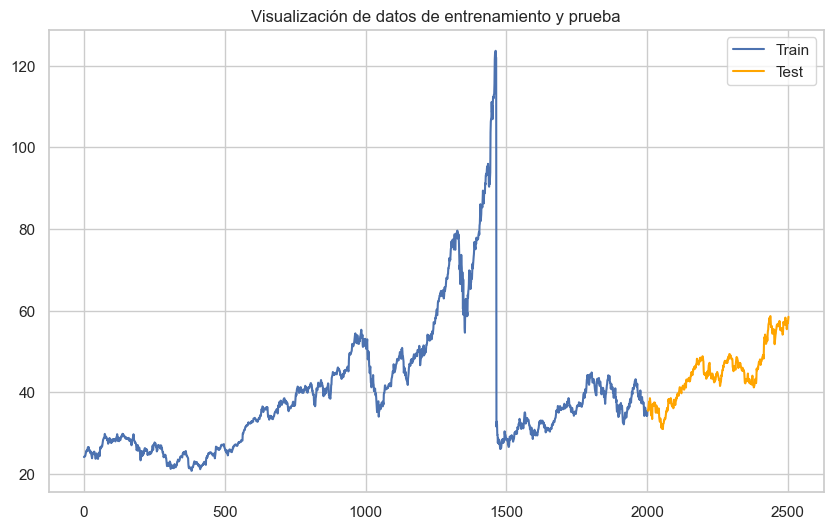

XGBoost Optimizado - MAE: 0.29763763869356014, RMSE: 0.43682584115746387, R²: 0.9955125948271191


In [50]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

# 1. Función para crear características de retardos (lagged features)
def create_lagged_features(df, target, lags=5):  # Incrementamos a 5 retardos
    for lag in range(1, lags + 1):
        df[f'lag_{lag}'] = df[target].shift(lag)
    df.dropna(inplace=True)  # Eliminamos los valores NaN resultantes
    return df

# 2. Aplicar la función de retardos en 'close'
df_lagged = create_lagged_features(apple_adjusted, 'close', lags=5)

# 3. Dividir en conjunto de entrenamiento y prueba
X = df_lagged.drop(['close'], axis=1)
y = df_lagged['close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Verificar la forma de los datos
print(f"Forma de X_train: {X_train.shape}")
print(f"Forma de y_train: {y_train.shape}")

# 4. Visualización de los datos de entrenamiento y prueba
plt.figure(figsize=(10,6))
plt.plot(y_train.values, label='Train')
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test.values, label='Test', color='orange')
plt.legend()
plt.title('Visualización de datos de entrenamiento y prueba')
plt.show()

# 5. Reentrenamiento del modelo XGBoost con ajustes manuales
model_xgb = xgb.XGBRegressor(objective='reg:squarederror', 
                             n_estimators=300,   # Aumentamos el número de árboles
                             learning_rate=0.05, # Disminuimos la tasa de aprendizaje
                             max_depth=6,        # Aumentamos la profundidad de los árboles
                             subsample=0.9,      # Usamos el 90% de los datos para cada árbol
                             random_state=42)

# 6. Entrenar el modelo XGBoost
model_xgb.fit(X_train, y_train)

# 7. Predicciones y evaluación
y_pred = model_xgb.predict(X_test)

# Aplanar y_test si es necesario
y_test_flat = y_test.values.flatten()

# Calcular las métricas
mse_xgb = mean_squared_error(y_test_flat, y_pred)
mae_xgb = mean_absolute_error(y_test_flat, y_pred)
r2_xgb = r2_score(y_test_flat, y_pred)

# Imprimir las métricas de evaluación
print(f"XGBoost Optimizado - MAE: {mae_xgb}, RMSE: {np.sqrt(mse_xgb)}, R²: {r2_xgb}")


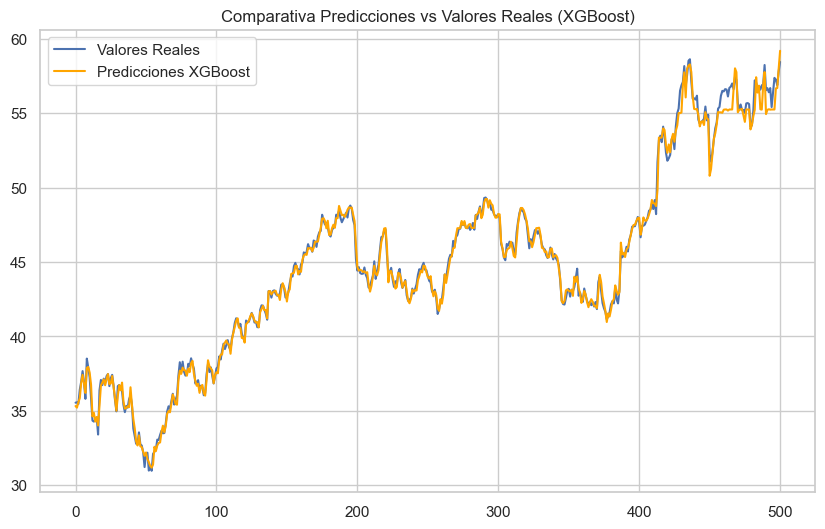

In [53]:
# Ejemplo de gráfico de Predicción vs Real
plt.figure(figsize=(10, 6))
plt.plot(y_test_flat, label='Valores Reales')
plt.plot(y_pred, label='Predicciones XGBoost', color='orange')
plt.legend()
plt.title('Comparativa Predicciones vs Valores Reales (XGBoost)')
plt.show()


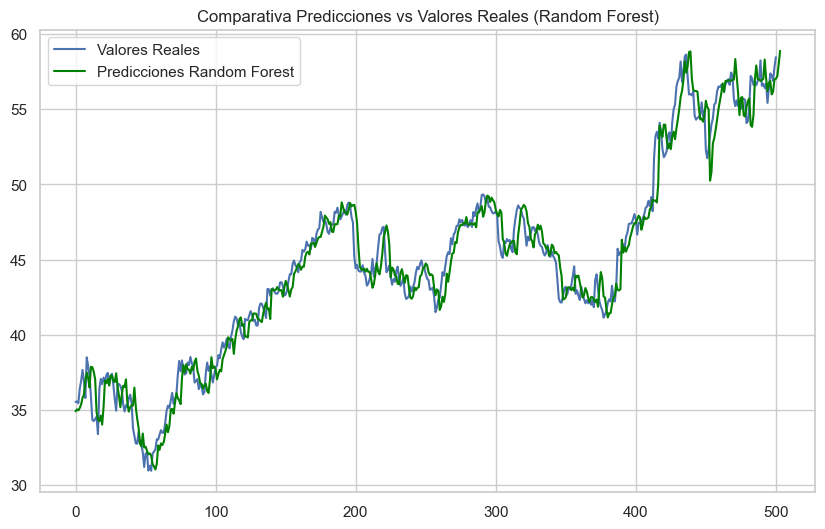

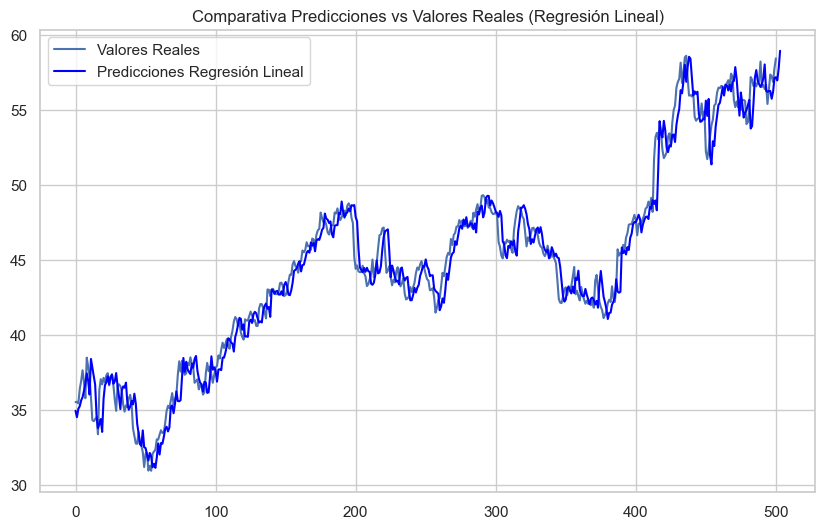

In [54]:
# Gráfico para Random Forest
plt.figure(figsize=(10, 6))
plt.plot(y_test_flat, label='Valores Reales')
plt.plot(y_pred_rf_adjusted, label='Predicciones Random Forest', color='green')
plt.legend()
plt.title('Comparativa Predicciones vs Valores Reales (Random Forest)')
plt.show()

# Gráfico para Regresión Lineal
plt.figure(figsize=(10, 6))
plt.plot(y_test_flat, label='Valores Reales')
plt.plot(y_pred_adjusted, label='Predicciones Regresión Lineal', color='blue')
plt.legend()
plt.title('Comparativa Predicciones vs Valores Reales (Regresión Lineal)')
plt.show()

### 4. ARIMA (Media móvil autorregresiva integrada) descartado

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Prepare the data (just using 'close' column)
train_data, test_data = apple_adjusted['close'][:-100], apple_adjusted['close'][-100:]

# Fit ARIMA model
model_arima = ARIMA(train_data, order=(5, 1, 0))
arima_fit = model_arima.fit()

# Make predictions
y_pred_arima = arima_fit.forecast(steps=len(test_data))
mse_arima = mean_squared_error(test_data, y_pred_arima)
print(f"ARIMA MSE: {mse_arima}")


ARIMA MSE: 56.418723584361075


c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\danny\OneDrive\Escritorio\bitcoin-vs-gold\.conda\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported 

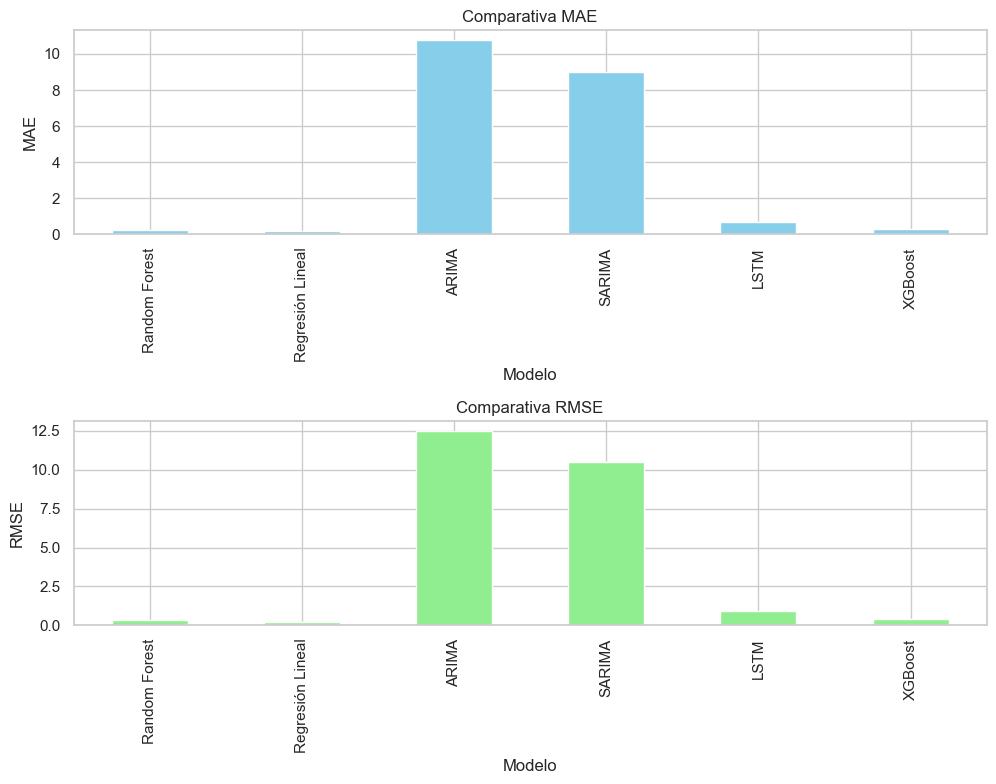

Modelo     MAE    RMSE      R²
0     Random Forest   0.246   0.331  0.9974
1  Regresión Lineal   0.184   0.238  0.9987
2             ARIMA  10.767  12.478     NaN
3            SARIMA   9.003  10.515     NaN
4              LSTM   0.687   0.898     NaN
5           XGBoost   0.297   0.437  0.9955

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Crear un DataFrame con los resultados de todos los modelos
results = {
    'Modelo': ['Random Forest', 'Regresión Lineal', 'ARIMA', 'SARIMA', 'LSTM', 'XGBoost'],
    'MAE': [0.246, 0.184, 10.767, 9.003, 0.687, 0.297],
    'RMSE': [0.331, 0.238, 12.478, 10.515, 0.898, 0.437],
    'R²': [0.9974, 0.9987, None, None, None, 0.9955]
}

df_results = pd.DataFrame(results)

# Gráfico de comparativa de MAE y RMSE
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# MAE
df_results.plot(x='Modelo', y='MAE', kind='bar', ax=ax[0], color='skyblue', legend=False)
ax[0].set_title('Comparativa MAE')
ax[0].set_ylabel('MAE')

# RMSE
df_results.plot(x='Modelo', y='RMSE', kind='bar', ax=ax[1], color='lightgreen', legend=False)
ax[1].set_title('Comparativa RMSE')
ax[1].set_ylabel('RMSE')

plt.tight_layout()
plt.show()

# Mostrar los resultados en forma de tabla
df_results


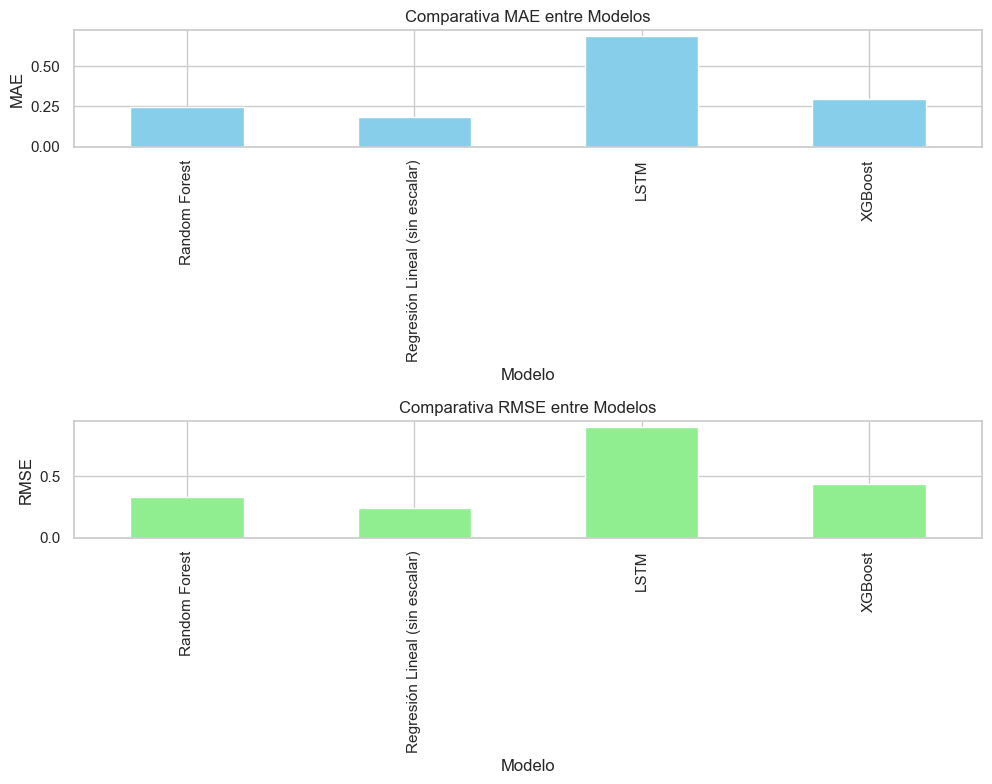

Modelo     MAE    RMSE      R²
0                   Random Forest  0.2463  0.3312  0.9974
1  Regresión Lineal (sin escalar)  0.1844  0.2377  0.9987
2                            LSTM  0.6870  0.8980     NaN
3                         XGBoost  0.2976  0.4368  0.9955

In [52]:
# Crear el DataFrame con los resultados de los modelos actualizados
results_updated = {
    'Modelo': ['Random Forest', 'Regresión Lineal (sin escalar)', 'LSTM', 'XGBoost'],
    'MAE': [0.2463, 0.1844, 0.687, 0.2976],
    'RMSE': [0.3312, 0.2377, 0.898, 0.4368],
    'R²': [0.9974, 0.9987, None, 0.9955]
}

df_results_updated = pd.DataFrame(results_updated)

# Gráfico de comparativa de MAE y RMSE
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# MAE
df_results_updated.plot(x='Modelo', y='MAE', kind='bar', ax=ax[0], color='skyblue', legend=False)
ax[0].set_title('Comparativa MAE entre Modelos')
ax[0].set_ylabel('MAE')

# RMSE
df_results_updated.plot(x='Modelo', y='RMSE', kind='bar', ax=ax[1], color='lightgreen', legend=False)
ax[1].set_title('Comparativa RMSE entre Modelos')
ax[1].set_ylabel('RMSE')

plt.tight_layout()
plt.show()

df_results_updated


# Modelos Entrenamientos comparativas 2

## Clean adicional y añadimos columnas

In [61]:
apple_data
data_report = data_quality_report(apple_data)

----- Informe de Calidad de Datos -----

Valores nulos por columna:
 open               0
high               0
low                0
close              0
volume             0
dividends          0
stock_splits       0
dividend_return    0
lag_1              0
lag_2              0
lag_3              0
lag_4              0
lag_5              0
dtype: int64

Número de filas duplicadas: 0

Tipos de datos:
 open               float64
high               float64
low                float64
close              float64
volume             float64
dividends          float64
stock_splits       float64
dividend_return    float64
lag_1              float64
lag_2              float64
lag_3              float64
lag_4              float64
lag_5              float64
dtype: object

Descripción estadística de las columnas numéricas:
               open         high          low        close        volume  \
count  2503.000000  2503.000000  2503.000000  2503.000000  2.503000e+03   
mean     40.547060    40.974

In [62]:
data_report

{'null_values': open               0
 high               0
 low                0
 close              0
 volume             0
 dividends          0
 stock_splits       0
 dividend_return    0
 lag_1              0
 lag_2              0
 lag_3              0
 lag_4              0
 lag_5              0
 dtype: int64,
 'duplicates': 0,
 'data_types': open               float64
 high               float64
 low                float64
 close              float64
 volume             float64
 dividends          float64
 stock_splits       float64
 dividend_return    float64
 lag_1              float64
 lag_2              float64
 lag_3              float64
 lag_4              float64
 lag_5              float64
 dtype: object,
 'descriptive_stats':               open         high          low        close        volume  \
 count  2503.000000  2503.000000  2503.000000  2503.000000  2.503000e+03   
 mean     40.547060    40.974323    40.149936    40.584083  9.477409e+07   
 std      14.900736    

In [ ]:
apple_data

In [63]:
# Asegurarse de que el índice actual es un DateTimeIndex
apple_data.index = pd.to_datetime(apple_data.index)  # Convertir el índice en formato datetime si aún no lo es

# Añadir la columna 'date' que replica el índice actual
apple_data['date'] = apple_data.index

# Verificar que la columna 'date' ha sido añadida correctamente
print(apple_data.head())


                                open       high        low      close  \
Date                                                                    
2014-11-04 00:00:00-05:00  24.275381  24.304237  23.911339  24.106678   
2014-11-05 00:00:00-05:00  24.217663  24.262059  24.002345  24.164389   
2014-11-06 00:00:00-05:00  24.211217  24.253576  24.032867  24.233511   
2014-11-07 00:00:00-05:00  24.244655  24.371731  24.200068  24.302620   
2014-11-10 00:00:00-05:00  24.304847  24.373959  24.226818  24.262489   

                                volume  dividends  stock_splits  \
Date                                                              
2014-11-04 00:00:00-05:00  166297600.0     0.0000           0.0   
2014-11-05 00:00:00-05:00  149743600.0     0.0000           0.0   
2014-11-06 00:00:00-05:00  139874000.0     0.1175           0.0   
2014-11-07 00:00:00-05:00  134766000.0     0.0000           0.0   
2014-11-10 00:00:00-05:00  108782000.0     0.0000           0.0   

                  

In [65]:
apple_data.dtypes

open                                        float64
high                                        float64
low                                         float64
close                                       float64
volume                                      float64
dividends                                   float64
stock_splits                                float64
dividend_return                             float64
lag_1                                       float64
lag_2                                       float64
lag_3                                       float64
lag_4                                       float64
lag_5                                       float64
date               datetime64[ns, America/New_York]
dtype: object

Agregar retornos logarítmicos (Log Returns):

Los retornos logarítmicos pueden ser útiles para predecir el comportamiento del precio a futuro, ya que tienden a estabilizar la varianza a lo largo del tiempo.

In [66]:
apple_data['log_return'] = np.log(apple_data['close'] / apple_data['close'].shift(1))
apple_data.dropna(inplace=True)  # Eliminar filas con NaN generados por shift


Volatilidad histórica:

La volatilidad es un indicador clave en los mercados financieros y podría ayudarte a capturar la fluctuación de precios a lo largo del tiempo.

In [67]:
apple_data['volatility'] = apple_data['log_return'].rolling(window=30).std() * np.sqrt(30)
apple_data.dropna(inplace=True)  # Eliminar filas con NaN


Media móvil (Moving Average):

Incluir medias móviles de 50 días, 100 días o más largas puede ayudarte a capturar tendencias más generales.


In [68]:
apple_data['ma50'] = apple_data['close'].rolling(window=50).mean()
apple_data['ma100'] = apple_data['close'].rolling(window=100).mean()
apple_data.dropna(inplace=True)  # Eliminar filas con NaN


Relación entre volumen y precio (Volume-to-Price Ratio):

La relación entre el volumen y el precio puede ser un buen indicador de movimientos significativos en el mercado.

In [69]:
apple_data['volume_to_price'] = apple_data['volume'] / apple_data['close']

In [70]:
apple_data

open       high        low      close  \
Date                                                                    
2015-05-12 00:00:00-04:00  28.229118  28.516803  28.053810  28.289803   
2015-05-13 00:00:00-04:00  28.352734  28.586478  28.289803  28.321268   
2015-05-14 00:00:00-04:00  28.635919  28.982038  28.579730  28.982038   
2015-05-15 00:00:00-04:00  29.009014  29.103411  28.815726  28.941587   
2015-05-18 00:00:00-04:00  28.853928  29.379852  28.849432  29.260733   
...                              ...        ...        ...        ...   
2024-10-09 00:00:00-04:00  56.307499  57.437500  56.207500  57.384998   
2024-10-10 00:00:00-04:00  56.945000  57.375000  56.792500  57.259998   
2024-10-11 00:00:00-04:00  57.325001  57.352501  56.834999  56.887501   
2024-10-14 00:00:00-04:00  57.174999  57.932499  57.150002  57.825001   
2024-10-15 00:00:00-04:00  58.402500  59.372501  58.092499  58.462502   

                                volume  dividends  stock_splits  \
Date                                                              
2015-05-12 00:00:00-04:00  192640000.0        0.0           0.0   
2015-05-13 00:00:00-04:00  138776800.0        0.0           0.0   
2015-05-14 00:00:00-04:00  180814000.0        0.0           0.0   
2015-05-15 00:00:00-04:00  152832000.0        0.0           0.0   
2015-05-18 00:00:00-04:00  203531600.0        0.0           0.0   
...                                ...        ...           ...   
2024-10-09 00:00:00-04:00    8397775.0        0.0           0.0   
2024-10-10 00:00:00-04:00    7045875.0        0.0           0.0   
2024-10-11 00:00:00-04:00    7939800.0        0.0           0.0   
2024-10-14 00:00:00-04:00    9970525.0        0.0           0.0   
2024-10-15 00:00:00-04:00   16176900.0        0.0           0.0   

                           dividend_return      lag_1      lag_2      lag_3  \
Date                                                                          
2015-05-12 00:00:00-04:00            0.365  28.390938  28.683115  28.152700   
2015-05-13 00:00:00-04:00            0.365  28.289803  28.390938  28.683115   
2015-05-14 00:00:00-04:00            0.365  28.321268  28.289803  28.390938   
2015-05-15 00:00:00-04:00            0.365  28.982038  28.321268  28.289803   
2015-05-18 00:00:00-04:00            0.365  28.941587  28.982038  28.321268   
...                                    ...        ...        ...        ...   
2024-10-09 00:00:00-04:00            7.535  56.442501  55.422501  56.700001   
2024-10-10 00:00:00-04:00            7.535  57.384998  56.442501  55.422501   
2024-10-11 00:00:00-04:00            7.535  57.259998  57.384998  56.442501   
2024-10-14 00:00:00-04:00            7.535  56.887501  57.259998  57.384998   
2024-10-15 00:00:00-04:00            7.535  57.825001  56.887501  57.259998   

                               lag_4      lag_5                      date  \
Date                                                                        
2015-05-12 00:00:00-04:00  27.979637  28.156456 2015-05-12 00:00:00-04:00   
2015-05-13 00:00:00-04:00  28.152700  27.979637 2015-05-13 00:00:00-04:00   
2015-05-14 00:00:00-04:00  28.683115  28.152700 2015-05-14 00:00:00-04:00   
2015-05-15 00:00:00-04:00  28.390938  28.683115 2015-05-15 00:00:00-04:00   
2015-05-18 00:00:00-04:00  28.289803  28.390938 2015-05-18 00:00:00-04:00   
...                              ...        ...                       ...   
2024-10-09 00:00:00-04:00  56.417500  56.695000 2024-10-09 00:00:00-04:00   
2024-10-10 00:00:00-04:00  56.700001  56.417500 2024-10-10 00:00:00-04:00   
2024-10-11 00:00:00-04:00  55.422501  56.700001 2024-10-11 00:00:00-04:00   
2024-10-14 00:00:00-04:00  56.442501  55.422501 2024-10-14 00:00:00-04:00   
2024-10-15 00:00:00-04:00  57.384998  56.442501 2024-10-15 00:00:00-04:00   

                           log_return  volatility       ma50      ma100  \
Date                                                                      
2015-05-12 00:00:00-04:00   -0

# Preuba uno, download and cleaning

In [ ]:
# Descargar los datos del oro (GOLD)
apple = yf.Ticker("AAPL")

# Obtener datos históricos (últimos 5 años)
apple_data = apple.history(period="10y")

# Mostrar los primeros 5 registros
apple_data.head(-5)

In [15]:
apple_data =  normalizar_nombres_columnas(apple_data)

In [ ]:
apple_data.columns

In [ ]:
#Comprobamos nulos
apple_data.isnull().sum()

In [ ]:
# Comprobamos duplicados
apple_data.duplicated().sum()

In [ ]:
apple_data.dtypes

In [ ]:
apple_data.describe

## intendo de rescatar mas datos de la compañia a travez de la API de yahoo

In [ ]:
per = apple.info['trailingPE']
print(f"El PER de Apple es: {per}")

market_cap = apple.info['marketCap']
print(f"La capitalización bursátil de Apple es: {market_cap}")



In [ ]:
import yfinance as yf

# Obtener datos de Apple
aapl = yf.Ticker("AAPL")

# Información básica
print(apple.info)

# PER
print("PER:", apple.info['trailingPE'])

# Capitalización bursátil
print("Market Cap:", apple.info['marketCap'])

# Precio actual
print("Precio actual:", aapl.info['regularMarketPrice'])

# 52 semanas máximos y mínimos
print("52 semanas máximo:", apple.info['fiftyTwoWeekHigh'])
print("52 semanas mínimo:", apple.info['fiftyTwoWeekLow'])

## Youtube video, en el cual realiza machine learning sobre el sp500

In [ ]:
apple_data.index


In [ ]:
apple_data.plot.line(y="close", use_index=True)

In [40]:
del apple_data["dividends"]
del apple_data["stock_splits"]
# las eliminamos porque no las vamos a usar

In [41]:
apple_data["tomorrow"]=  apple_data["close"].shift(-1)

In [ ]:
apple_data

In [43]:
apple_data["target"] = (apple_data["tomorrow"] > apple_data["close"]).astype(int)

In [ ]:
apple_data

In [ ]:
apple_data.columns

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# Separamos los datos en entrenamiento y prueba
train = apple_data.iloc[:-100]
test= apple_data.iloc[-100:]
predictors = ["close", "volume", "open", "high", "low"]
model.fit(train[predictors], train["target"])

In [47]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

In [48]:
preds  = pd.Series(preds, index= test.index)

In [ ]:
precision_score(test["target"], preds)

In [50]:
combined = pd.concat([test["target"], preds], axis=1)

In [ ]:
combined.plot()

In [52]:
##backtesting
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index= test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [53]:
def backtest(data, model, predictors, start= 2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions)


In [54]:
predictions = backtest(apple_data, model, predictors)

In [ ]:
predictions["predictions"].value_counts()

In [ ]:
precision_score(predictions["target"]), predictions["predictions"]

In [ ]:
predictions["target"].value_counts() /predictions.shape[0]

In [33]:
horizons = [2,5,60,250,1000]

new_predictions =[]

for horizon in horizons:

    rolling_averages = apple_data.rolling(horizon).mean()

    ratio_column = f"Close_ratio_{horizon}"
    apple_data[ratio_column] = apple_data["close"] / rolling_averages["close"]

    trend_column = f"Trend_{horizon}"
    apple_data[trend_column] = apple_data.shift(1).rolling(horizon).sum()["target"]

    new_predictions += [ratio_column, trend_column]

In [ ]:
apple_data = apple_data.dropna()
apple_data

In [36]:
# improving model
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [39]:
##backtesting
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds < .6] = 0
    preds = pd.Series(preds, index= test.index, name="predictions")
    combined = pd.concat([test["target"], preds], axis=1)
    return combined

In [ ]:
predictions = backtest(apple_data, model, new_predictions)

In [ ]:
predictions["predictions"].value_counts()

In [ ]:
precision_score(predictions["target"], predictions["predictions"])

# Sugerencia medias moviles estrategia de gestión de cartera

In [ ]:
import yfinance as yf

# Obtener datos históricos de Apple (AAPL)
aapl = yf.download("AAPL", start="2018-01-01", end="2023-12-31")

# Mostrar los primeros 5 registros
print(aapl.head())

In [ ]:
# Calcular medias móviles simple y exponencial
aapl['SMA50'] = aapl['Close'].rolling(window=50).mean()
aapl['EMA20'] = aapl['Close'].ewm(span=20, adjust=False).mean()
# Calcular bandas de Bollinger
aapl['BB_upper'] = aapl['EMA20'] + 2 * aapl['Close'].rolling(window=20).std()
aapl['BB_lower'] = aapl['EMA20'] - 2 * aapl['Close'].rolling(window=20).std()

# Crear señales de compra y venta
aapl['Buy_Signal'] = np.where((aapl['EMA20'] > aapl['SMA50']) & (aapl['Close'] < aapl['BB_lower']), 1, 0)
aapl['Sell_Signal'] = np.where((aapl['EMA20'] < aapl['SMA50']) & (aapl['Close'] > aapl['BB_upper']), 1, 0)

# Visualizar los datos
plt.figure(figsize=(12, 6))
plt.plot(aapl['Close'], label='Precio de Cierre')
plt.plot(aapl['SMA50'], label='SMA50')
plt.plot(aapl['EMA20'], label='EMA20')
plt.fill_between(aapl.index, aapl['BB_upper'], aapl['BB_lower'], alpha=0.2)
plt.legend()
plt.show()

In [ ]:
# Inicializar variables para el backtesting
cash = 100000  # Capital inicial
shares = 0
in_position = False

# Parámetros adicionales
comision = 0.001  # Comisión por operación (0.1%)
deslizamiento = 0.005  # Deslizamiento del 0.5%
tasa_impuestos = 0.25  # Tasa de impuestos sobre ganancias (25%)

# Inicializar variables para el backtesting
cash = 100000
shares = 0
in_position = False
portfolio_value = [cash]

# Simular la estrategia
for i in range(1, len(aapl)):
    # Ajustar el precio por el deslizamiento
    adjusted_price = aapl['Close'].iloc[i] * (1 + np.random.uniform(-deslizamiento, deslizamiento))

    if aapl['Buy_Signal'].iloc[i] == 1 and not in_position:
        shares = (cash - cash * comision) // adjusted_price
        cash -= shares * adjusted_price
        in_position = True
    elif aapl['Sell_Signal'].iloc[i] == 1 and in_position:
        proceeds = shares * adjusted_price * (1 - comision)
        taxes = (proceeds - cash) * tasa_impuestos
        cash = proceeds - taxes
        shares = 0
        in_position = False

    # Calcular el valor de la cartera
    portfolio_value.append(cash + shares * aapl['Close'].iloc[i])

# Convertir la lista de valores de la cartera en un DataFrame
portfolio = pd.DataFrame(portfolio_value, index=aapl.index, columns=['Portfolio Value'])

# Calcular métricas de evaluación
returns = portfolio.pct_change()
annualized_return = (1 + returns.mean())**252 - 1
max_drawdown = (portfolio.cummax() - portfolio) / portfolio.cummax().shift().fillna(method='ffill')
sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)

# Visualizar los resultados
plt.figure(figsize=(12, 6))
plt.plot(portfolio)
plt.title('Evolución del Valor de la Cartera')
plt.ylabel('Valor')
plt.xlabel('Fecha')
plt.show()

print("Rentabilidad anualizada:", annualized_return)
print("Máximo drawdown:", max_drawdown.max())
print("Ratio de Sharpe:", sharpe_ratio)